In [141]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow import keras

import matplotlib.pyplot as plt
import cv2
import os

In [142]:
model = tf.keras.models.load_model('savedModels/test_model.keras')

In [143]:
numbers = np.empty([0,28,28])
labels = []
for i in range(10):
    for dirpath,dirnames,filenames in (os.walk(f"numbers/{i}")):
        for file in filenames:
            img = cv2.imread(f"numbers/{i}/{file}",cv2.IMREAD_GRAYSCALE) 
            img = cv2.resize(img,(28,28), interpolation=cv2.INTER_AREA)
            img = (255-img)/255.0
            
            img = np.reshape(img,(1,28,28))
            numbers = np.append(numbers, img, axis=0)
            labels.append(i)
labels = np.array(labels)

In [144]:
def show_img(i, data, labels):
    '''
    Show image at index i of array of images
    '''
    plt.imshow((data)[i], cmap=plt.cm.binary)
    
    predA = (model.predict(data)[i])
    pred = np.argmax(predA)
    
    if (pred == labels[i]):
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel(f"Pred:{pred} (Actual:{labels[i]})", color=color)

In [145]:
def plot_graph(num_rows, num_cols, data, labels):
  '''
  Plot a graph of num_rows x num_cols with image and prediction.
  xlabel green for correct predictions, red for incorrect
  
  Parameters
  ----------
  num_rows: (int) number of rows
  num_cols: (int) number of columns
  data: NDArray(float64) Array of images
  label: list[int] List of labels corresponding to images
  '''
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    show_img(i,data,labels)
  plt.tight_layout()
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


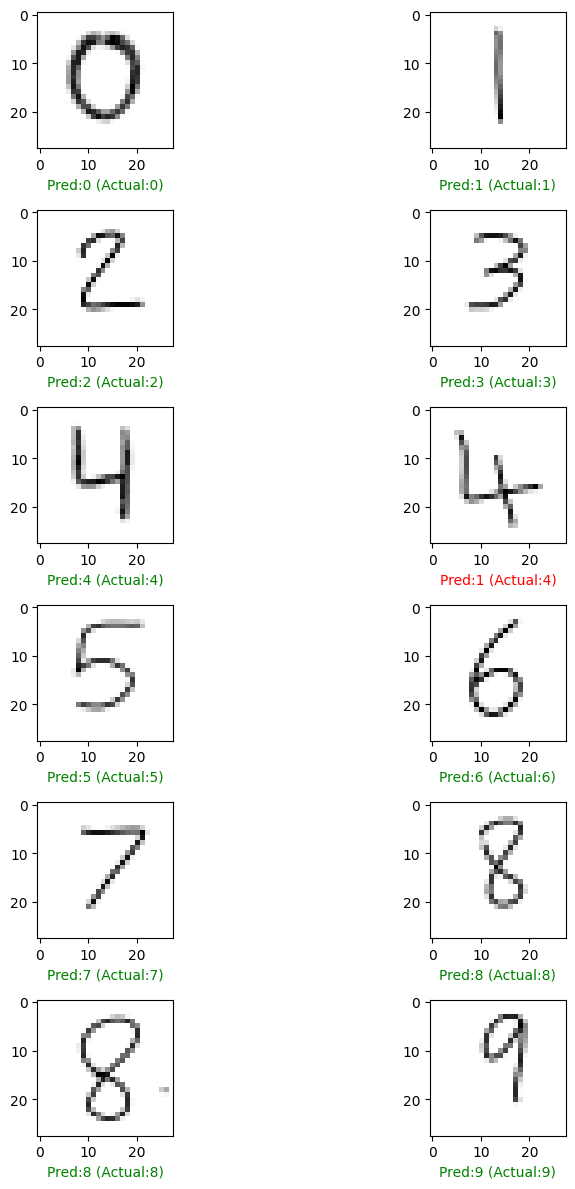

In [146]:
plot_graph(6,2,numbers,labels)

In [147]:
print(labels.shape)
#test_dataset = tf.data.Dataset.from_tensor_slices(numbers,labels)
model.evaluate(numbers,labels)

(12,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9167 - loss: 0.3895


[0.38954827189445496, 0.9166666865348816]